In [1]:
import os
import scipy.stats as stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import pytz
from sklearn.utils import resample
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor as MPR
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from scipy.optimize import curve_fit
from matplotlib.ticker import NullFormatter
import Data_Processor as DP
import importlib

%matplotlib notebook

importlib.reload(DP)
# warnings.filterwarnings('ignore')
Root = 'C:/FishIsland_2017/'
# FluxFolder='FluxResults/ProperWindSpeeds/'

# TenHz_Path = Root+FluxFolder+'10Hz/eddypro_10Hz_full_output_2018-03-25T172145_adv.csv'
# OneHz_Path = Root+FluxFolder+'1Hz/eddypro_1Hz_full_output_2018-03-25T142146_adv.csv'

# Met_Path = Root+'MetStationData/CR1000_ClimateData_Updated.txt'
# Soil_Path = Root+'SoilStationData/Soil_Data.csv'



for root,Dir,files in (os.walk(Root+'TagluStationData/Daily/')):
    for i,file in enumerate(files):
        print(file)
        df = pd.read_excel(root+file,sheet_name=[0],skiprows=[0,2,3],na_values='NAN')[0]
        df = df.set_index(pd.DatetimeIndex(df.TIMESTAMP))
        for V in ['SoilMoist_Avg(1)','SoilMoist_Avg(2)','SoilMoist_Avg(3)','SoilMoist_Avg(4)','SoilMoist_Avg(5)','SoilMoist_Avg(6)']:
            df[V]=pd.to_numeric(df[V])
        if i <= 5:
            df[['SoilMoist_Avg(1)','SoilMoist_Avg(2)','SoilMoist_Avg(3)','SoilMoist_Avg(4)','SoilMoist_Avg(5)','SoilMoist_Avg(6)']]*=100
        elif i == 6:
            df.loc[df.index<='7/23/2014 13:00',['SoilMoist_Avg(1)','SoilMoist_Avg(2)','SoilMoist_Avg(3)','SoilMoist_Avg(4)','SoilMoist_Avg(5)','SoilMoist_Avg(6)']]*=100
        df = df.loc[pd.isnull(df.index)==False]
        if i == 0:
            Daily = df
        else:
            Daily = Daily.append(df)
            


for root,Dir,files in (os.walk(Root+'TagluStationData/Hourly/')):
    for i,file in enumerate(files):
        print(file)
        try:
            df = pd.read_excel(root+file,sheet_name=[0],skiprows=[0,1,3],na_values='NAN')[0]
            df = df.set_index(pd.DatetimeIndex(df.TIMESTAMP))
            for V in ['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']:
                df[V]=pd.to_numeric(df[V])
    #         df[['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']] =\
    #         pd.to_numeric(df[['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']])
            if i <= 5:
                df[['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']]*=100
            elif i == 6:
                df.loc[df.index<='7/23/2014 13:00',['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']]*=100

            df = df.loc[pd.isnull(df.index)==False]
            if i == 0:
                Hourly = df
            else:
                Hourly = Hourly.append(df)
        except:
            pass
#         plt.figure()
#         plt.plot(df['SoilMoist(3)'])
        if df.index.year.values[10]==2014:
            print(df.loc[df.index.month==7])

Daily.loc[Daily['Snow_Depth']<0] = np.nan
Daily.loc[Daily['Snow_Depth']>1] = np.nan
# Daily['Snow_Depth'] = Daily['Snow_Depth'].ffill()

Daily.loc[Daily['Snow_Depth']<0] = np.nan
Daily.loc[Daily['Snow_Depth']>.7] = np.nan
Daily['Snow_Depth'].ffill()

# Daily2=Hourly.resample('D').mean()
# plt.plot(Hourly['SoilMoist(3)'])

# Daily2=Daily2.groupby(Daily2.in55index.dayofyear).mean()
# print(Monthly)

Taglu Tower DAILY 2008 Aug 27_Dec 31.xls
Taglu Tower DAILY 2009 Jan 1_Dec 31.xls
Taglu Tower DAILY 2010 Jan 1_Dec 31.xls
Taglu Tower DAILY 2011 Jan 1_Dec 31.xls
Taglu Tower DAILY 2012 Jan 1_Dec 31.xls
Taglu Tower DAILY 2013 Jan 1_Dec 31.xls
Taglu Tower DAILY 2014 Jan 1_Dec 31.xls
Taglu Tower DAILY 2015 Jan 1_Dec 31.xlsx
Taglu Tower DAILY 2016 Jan 1_Dec.xlsx
Taglu Tower DAILY 2017 Jan 1_Dec 31.xlsx
Taglu Tower DAILY 2018 Jan 1_Dec.xlsx
Taglu Tower DAILY 2019 Jan 1_July.xlsx
Taglu Tower HOURLY 2008 Aug 27_Dec 31.xls
Taglu Tower HOURLY 2009 Jan 1_Dec 31.xls
Taglu Tower HOURLY 2010 Jan 1_Dec 31.xls
Taglu Tower HOURLY 2011 Jan 1_Dec 31.xls
Taglu Tower HOURLY 2012 Jan 1_Dec 31.xls
Taglu Tower HOURLY 2013 Jan 1_Dec 31.xls
Taglu Tower HOURLY 2014 Jan 1_Dec 31.xls
                              TIMESTAMP   RECORD  AirTemp  AirTemp_Avg  \
TIMESTAMP                                                                
2014-07-01 00:00:00 2014-07-01 00:00:00  51220.0   18.190       18.900   
2014-07-01 0

TIMESTAMP
2008-08-27      NaN
2008-08-28      NaN
2008-08-29      NaN
2008-08-30      NaN
2008-08-31      NaN
              ...  
2019-07-18    0.099
2019-07-19    0.099
2019-07-20    0.050
2019-07-21    0.050
2019-07-22    0.050
Name: Snow_Depth, Length: 3982, dtype: float64

<IPython.core.display.Javascript object>


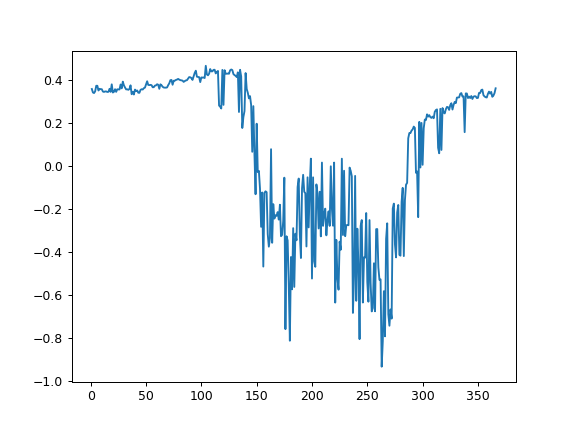

230


In [9]:
# Hourly['datetime']=Hourly['TIMESTAMP']
# Hourly = Hourly.drop(columns='TIMESTAMP')
# Hourly = Hourly.set_index('datetime')
# Hourly.head()
plt.figure()
plt.plot(Daily.groupby(Daily.index.dayofyear).mean()['Snow_Depth_Min'])
Temp = Daily.groupby(Daily.index.dayofyear).mean()['Snow_Depth_Min']
print(Temp[Temp>0].count())

In [7]:
Hourly['Delta_SoilMoist(4)'] = Hourly['SoilMoist(4)'].diff(24)
Hourly['Delta_SoilMoist(5)'] = Hourly['SoilMoist(5)'].diff(24)
Hourly['Total_Rainfall_Tot'] = Hourly['Rainfall_Tot'].rolling(24).sum()
# Hourly['fco2']=np.nan
# Hourly['fch4']=np.nan
# Hourly['ER']=np.nan
# Hourly['wind_speed']=np.nan
# Hourly['u*']=np.nan
# Hourly['Time']=Hourly.index.hour
Hourly.to_csv('C:\\Users\\wesle\\NetworkAnalysis\\FishIsland/TagluRecord.csv')

In [5]:
# import cf2cdm
# path = 'C:\\Users\wesle\\Downloads\\NARRsfc_201706_2030'+'merged_AWIP32.2017062000.RS'
# ds = xr.open_dataset(path, engine='cfgrib')
# cf2cdm.translate_coords(ds, cf2cdm.ECMWF)

RECORD                95510
AirTemp               95510
AirTemp_Avg           95510
Rainfall_Tot          95510
SoilMoist(1)          71263
SoilMoist(2)          85890
SoilMoist(3)          95308
SoilMoist(4)          94148
SoilMoist(5)          95510
SoilMoist(6)          60514
Net_SW_Wm2_Avg        95510
Net_LW_Wm2_Avg        95510
Net_Ttl_Rad_Avg       95510
WindSpd               95510
WindDir               95510
Unnamed: 16               2
Unnamed: 17               1
Delta_SoilMoist(4)    94057
Delta_SoilMoist(5)    95486
Total_Rainfall_Tot    95487
dtype: int64


<IPython.core.display.Javascript object>


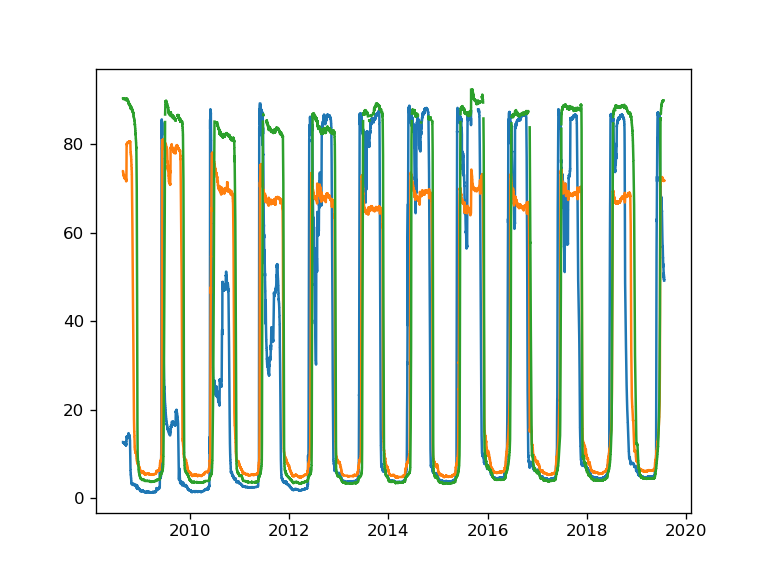

In [24]:
print(Hourly.count())
plt.figure()
plt.plot(Hourly['SoilMoist(4)'])
plt.plot(Hourly['SoilMoist(5)'])
plt.plot(Hourly['SoilMoist(2)'])
# plt.plot(Hourly['SoilMoist(1)'])

In [3]:
Temp = Hourly.loc[(((Hourly.index.dayofyear>174)&(Hourly.index.dayofyear<256))&
# Temp = Hourly.loc[(((Hourly.index.month>6)&(Hourly.index.month<9))&

                   ((Hourly.index.year>2008)&(Hourly.index.year<=2018))),
                  ]

V = ['AirTemp_Avg','Rainfall_Tot','WindSpd','Net_Ttl_Rad_Avg','SoilMoist(4)']

for v in V:
    print(v)
    if v == 'Rainfall_Tot':
        print(Temp[v].groupby(Temp.index.year).sum().sort_values())
    else:
        print(Temp[v].groupby(Temp.index.year).mean().sort_values())
    
# print(Temp.loc[Temp.index.year==2017].mean())


print(Temp.groupby(Temp.index.year).mean()[V].describe())
# print(Hourly.loc[((Hourly.index.dayofyear>174)&(Hourly.index.dayofyear<256)),['AirTemp_Avg']].mean())
# print(Hourly.loc[((Hourly.index.dayofyear>174)&(Hourly.index.dayofyear<256)),['AirTemp_Avg']].mean())
# print(Hourly.groupby(Hourly.index.month).std()['AirTemp_Avg']/Hourly.groupby(Hourly.index.month).count()['AirTemp_Avg']**.5)
# print(Hourly.groupby(Hourly.index.month).mean()['AirTemp_Avg'])

AirTemp_Avg
TIMESTAMP
2018     7.520072
2009     8.047764
2015     9.003697
2014     9.060730
2013     9.757267
2016     9.810463
2011    10.348982
2017    10.694671
2010    10.962252
2012    12.967892
Name: AirTemp_Avg, dtype: float64
Rainfall_Tot
TIMESTAMP
2009      5.1
2011     28.3
2016     56.6
2014     70.5
2010     87.2
2012     89.7
2018    105.4
2013    107.4
2017    111.5
2015    127.6
Name: Rainfall_Tot, dtype: float64
WindSpd
TIMESTAMP
2016    3.600754
2011    3.623702
2012    3.625770
2013    3.651469
2009    3.676748
2010    3.705674
2018    3.738458
2015    3.817488
2017    3.836507
2014    3.963767
Name: WindSpd, dtype: float64
Net_Ttl_Rad_Avg
TIMESTAMP
2015     81.617535
2018     94.185540
2010     94.791220
2012     97.004440
2016     97.064651
2014     97.665816
2017     99.344223
2011     99.969369
2013    100.760312
2009    102.040433
Name: Net_Ttl_Rad_Avg, dtype: float64
SoilMoist(4)
TIMESTAMP
2009    17.358951
2010    29.614403
2011    39.565432
2012    63.111471

In [11]:
Temp=Hourly.loc[Hourly.index.month<=9]
Temp=Temp.loc[Temp.index.month>=6]
print(Temp.count()/Temp.count().max())
print()

print(Hourly.count()/Hourly.count().max())

print(Hourly.groupby(Hourly.index.month).mean()['AirTemp'])
# plt.figure()
# plt.plot(Hourly['SoilMoist(1)'])

TIMESTAMP             1.000000
RECORD                1.000000
AirTemp               1.000000
AirTemp_Avg           1.000000
Rainfall_Tot          1.000000
SoilMoist(1)          0.370279
SoilMoist(2)          0.778771
SoilMoist(3)          0.994190
SoilMoist(4)          0.976600
SoilMoist(5)          1.000000
SoilMoist(6)          0.645363
Net_SW_Wm2_Avg        1.000000
Net_LW_Wm2_Avg        1.000000
Net_Ttl_Rad_Avg       1.000000
WindSpd               1.000000
WindDir               1.000000
Unnamed: 16           0.000064
Unnamed: 17           0.000032
Delta_SoilMoist(4)    0.975515
Total_Rainfall_Tot    0.999266
Month                 1.000000
DOY                   1.000000
dtype: float64

TIMESTAMP             1.000000
RECORD                1.000000
AirTemp               1.000000
AirTemp_Avg           1.000000
Rainfall_Tot          1.000000
SoilMoist(1)          0.746131
SoilMoist(2)          0.899278
SoilMoist(3)          0.997885
SoilMoist(4)          0.985740
SoilMoist(5)          1

In [3]:
Temp = Daily.copy()
# Temp['Snow']=Temp['Snow_Depth'].rolling(7).mean()
# Temp['Diff']=Temp['Snow'].diff()
Temp['Year']=Temp.index.year
# Diff = Temp.groupby('Year').min()['Diff'].values
# print(Diff)
# print(Temp.loc[Temp['Diff'].isin(Diff)])
Temp.loc[Temp['Snow_Depth']<.15,'Snow_Depth']=0
# Temp.loc[Temp['Snow_Depth']>=.15]=100
plt.figure(figsize=(10,8))
for y in Temp.Year.unique():
    Year = Temp.loc[Temp.Year==y]
    print(Year.loc[Year['Snow_Depth']==0].index.min())
    c='grey'
    if y==2014:
        c='r'
    plt.plot(Year.index.dayofyear,Year['Snow_Depth'],label=y,color=c)
plt.xlim(100,330)
plt.legend()
#     print(Temp.loc[(Temp.Year==y)&(Temp['Snow_Depth']==0)].index)
# plt.plot(Temp['Snow_Depth'])

<IPython.core.display.Javascript object>

NaT
2009-06-08 00:00:00
2010-05-30 00:00:00
2011-05-28 00:00:00
2012-05-24 00:00:00
NaT
2014-07-25 00:00:00
2015-06-09 00:00:00
2016-05-22 00:00:00
2017-05-19 00:00:00
2018-06-06 00:00:00
2019-05-27 00:00:00


In [5]:
Hourly['Month']=Hourly.index.month
print(Hourly['AirTemp_Avg'].mean())
print(Hourly['Rainfall_Tot'].sum())
print(Hourly[['AirTemp_Avg','Month']].groupby('Month').mean())
print(Hourly[['Rainfall_Tot','Month']].groupby('Month').sum())

# Summer = Hourly.loc[((Hourly.Month>=6)&(Hourly.Month<=9))]
# print(Summer.count()/Summer.shape[0])
# print(Summer.mean())

-8.506881604193307
1169.1
       AirTemp_Avg
Month             
1       -24.519606
2       -23.882282
3       -22.843827
4       -14.644406
5        -2.410955
6         6.706766
7        11.647060
8         9.584285
9         3.255057
10       -4.803488
11      -16.264000
12      -22.862270
       Rainfall_Tot
Month              
1               0.3
2               0.2
3               6.1
4              15.6
5              58.9
6             128.0
7             292.1
8             387.9
9             236.2
10             42.0
11              0.1
12              1.7


In [6]:
# Daily.columns
Thaw=[]
Freeze=[]
# plt.figure()
Daily=Hourly.resample('D').mean()
for Sm in range(1,6):
    Daily['Frozen']=1
    SM = 'SoilMoist('+str(Sm)+')'
    Daily.loc[Daily[SM]<20,'Frozen']=-1
    Daily['Temp']=Daily['Frozen'].diff(1)
#     plt.plot(Daily.index,Daily['Temp'])
    Thaw_Date = []
    Freeze_Date = []
    Yr = []
    i=Daily.index.year.min()
    for mn,mx in zip(Daily['Temp'].groupby(Daily.index.year).min().values,
                     Daily['Temp'].groupby(Daily.index.year).max().values):
        if i > 2008:
            Thaw_Date.append(Daily.loc[((Daily['Temp']==mx)&(Daily.index.year==i))].index.dayofyear.values[0])
        else:
            Thaw_Date.append(np.nan)
        if i < 2019:   
            Freeze_Date.append(Daily.loc[((Daily['Temp']==mn)&(Daily.index.year==i))].index.dayofyear.values[-1])
        else:
            Freeze_Date.append(np.nan)
        Yr.append(i)
        i +=1
#     plt.figure()
#     plt.bar(Yr,np.asanyarray(Thaw_Date))
    Thaw.append(Thaw_Date)
    Freeze.append(Freeze_Date)
        
Thaw=np.array(Thaw)
Freeze=np.array(Freeze)

Daily['5cm'] = 0
Daily['20cm'] = 0
Daily['40cm'] = 0
Thaw_5 = (Thaw[0]+Thaw[3])/2
Thaw_20 = (Thaw[1]+Thaw[4])/2
Thaw_40 = Thaw[2]
Freeze_5 = (Freeze[0]+Freeze[3])/2
Freeze_20 = (Freeze[1]+Freeze[4])/2
Freeze_40 = Freeze[2]
for yr,thaw,freeze in zip(Yr,Thaw_5,Freeze_5):
#     print(yr,thaw)
    Daily.loc[((Daily.index.year==yr)&(Daily.index.dayofyear>=thaw)),'5cm']=1
    Daily.loc[((Daily.index.year==yr)&(Daily.index.dayofyear>=freeze)),'5cm']=0
for yr,thaw,freeze in zip(Yr,Thaw_20,Freeze_20):
#     print(yr,thaw)
    Daily.loc[((Daily.index.year==yr)&(Daily.index.dayofyear>=thaw)),'20cm']=1
    Daily.loc[((Daily.index.year==yr)&(Daily.index.dayofyear>=freeze)),'20cm']=0
for yr,thaw,freeze in zip(Yr,Thaw_40,Freeze_40):
#     print(yr,thaw)
    Daily.loc[((Daily.index.year==yr)&(Daily.index.dayofyear>=thaw)),'40cm']=1
    Daily.loc[((Daily.index.year==yr)&(Daily.index.dayofyear>=freeze)),'40cm']=0

plt.figure()
plt.plot(Yr,Thaw_5)
plt.plot(Yr,Thaw_20)
plt.plot(Yr,Thaw_40)
plt.plot(Yr,Freeze_5)
plt.plot(Yr,Freeze_20)
plt.plot(Yr,Freeze_40)
plt.grid()
print(np.round(np.nanmean(Thaw_5)),
np.round(np.nanmean(Thaw_20)),
np.round(np.nanmean(Thaw_40)))
print(np.round(np.nanmean(Freeze_5)),
np.round(np.nanmean(Freeze_20)),
np.round(np.nanmean(Freeze_40)))

print(Thaw_5[-3],
Thaw_20[-3],
Thaw_40[-3],
Freeze_5[-3],
Freeze_20[-3],
Freeze_40[-3],)

<IPython.core.display.Javascript object>

148.0 165.0 180.0
299.0 331.0 352.0
144.5 165.5 177.0 305.5 331.0 353.0


In [7]:
fig = plt.figure()
i=2017
Thaw=[]
Frez=[]
SM='SoilMoist(2)'
for i in range(i,i+1):
    print(i)
    Temp = Hourly.loc[Hourly.index.year==i].resample('D').mean()
#     Temp[SM]-=Temp[SM].mean()
    Temp['Diff']=(Temp[SM]-Temp[SM].mean()).diff(1)
    Temp['CSM']=(Temp[SM]-Temp[SM].mean()).cumsum()/Temp[SM].count()#diff(2)
    Temp['CSMDiff']=Temp['CSM'].diff(1)
    Temp['DOY']=Temp.index.dayofyear
    print(Temp.loc[Temp['CSM']==Temp['CSM'].min(),'DOY'],'\n',
          Temp.loc[Temp['CSM']==Temp['CSM'].max(),'DOY'])
#     Tamp=Temp.loc[Temp['DOY']<200]
#     Thaw.append(Tamp.loc[Tamp['Diff']>=Tamp['Diff'].max()][['DOY']].values[0])
#     Timp=Temp.loc[Temp['DOY']>200]
#     Frez.append(Timp.loc[Timp['Diff']<=Timp['Diff'].min()][['DOY']].values[0])
    C='b'#[np.random.rand(),np.random.rand(),np.random.rand()]
    plt.plot(Temp.index.dayofyear,Temp[SM],c=C,linestyle=':')
    x2=plt.twinx()
    x2.plot(Temp.index.dayofyear,Temp['CSM'],c=C)
    print()
# plt.title(str(i)+'&'+str(i-1))
# fig.autofmt_xdate()
# fig
print(np.mean(np.array(Thaw)),np.mean(np.array(Frez)))
# plt.xlim(110,365)
# plt.xlim('2017-05-01','2017-7-01')
# plt.grid()
# plt.figure()
# plt.plot(Hourly[SM])

print(Temp.loc[((Temp['Diff']<0)&(Temp['CSMDiff']>0)),[SM,'Diff','CSMDiff']].iloc[0])
print(Temp.loc[((Temp['Diff']>0)&(Temp['CSMDiff']<0)),[SM,'Diff','CSMDiff']].iloc[0])
print(Temp.loc[np.isnan(Temp[SM])==False,SM].count()/365)

<IPython.core.display.Javascript object>

2017
TIMESTAMP
2017-06-21    172
Freq: D, Name: DOY, dtype: int64 
 TIMESTAMP
2017-11-24    328
Freq: D, Name: DOY, dtype: int64

nan nan
SoilMoist(2)    88.595833
Diff            -0.004167
CSMDiff          0.142581
Name: 2017-07-15 00:00:00, dtype: float64
SoilMoist(2)    5.939583
Diff            0.127083
CSMDiff        -0.093579
Name: 2017-01-02 00:00:00, dtype: float64
0.958904109589041


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
# # # Temp = Daily.loc[((Daily['SoilMoist(1)']>20) & (Daily['SoilMoist(2)']>70))]
# plt.figure()
# plt.scatter(Temp['SoilMoist(1)'],Temp['SoilMoist(4)'])
# # plt.figure()
# # plt.plot(Daily['SoilMoist(1)'])
Hourly['DOY']=Hourly.index.dayofyear
Temp = Hourly[['SoilMoist(1)','SoilMoist(2)','SoilMoist(4)','DOY','AirTemp','WindSpd','Net_Ttl_Rad_Avg']].resample('D').mean().dropna()
Temp = Temp.loc[Temp['SoilMoist(1)']>20]
import statsmodels.api as sm
Y = Temp['SoilMoist(1)']
X = Temp[[#'SoilMoist(2)',
          'SoilMoist(4)','AirTemp','WindSpd','Net_Ttl_Rad_Avg']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
plt.figure()
plt.scatter(#results.params[1]*Temp['SoilMoist(2)']+
        results.params[2-1]*Temp['SoilMoist(4)']+
#         results.params[3-1]*Temp['DOY']+
        results.params[4-2]*Temp['AirTemp']+
        results.params[5-2]*Temp['WindSpd']+
        results.params[6-2]*Temp['Net_Ttl_Rad_Avg']+
        1*results.params[0],Temp['SoilMoist(1)']
           )
# plt.plot(Temp['SoilMoist(1)'])
# plt.figure()
print(results.params)
# plt.plot(results.params*X.sum(axis=1))

results.summary()

<IPython.core.display.Javascript object>

const              38.907760
SoilMoist(4)        0.307287
AirTemp             0.285901
WindSpd             0.881442
Net_Ttl_Rad_Avg     0.064706
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SoilMoist(1)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     73.12
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           7.42e-50
Time:                        12:23:26   Log-Likelihood:                -2332.9
No. Observations:                 566   AIC:                             4676.
Df Residuals:                     561   BIC:                             4697.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              38.9078      2.289     16.995      0.000      34.411      43.405
SoilMoist(4)        0.3073      0.026     11.918      0.000       0.257       0.358
AirTemp             0.2859      0.103      2.766      0.006       0.083       0.489
WindSpd             0.8814      0.440      2.001      0.046       0.016       1.747
Net_Ttl_Rad_Avg     0.0647      0.012      5.554      0.000       0.042       0.088
==============================================================================
Omnibus:                       10.179   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.288
Skew:                          -0.248   Prob(JB):                      0.00354
Kurtosis:                       3.483   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


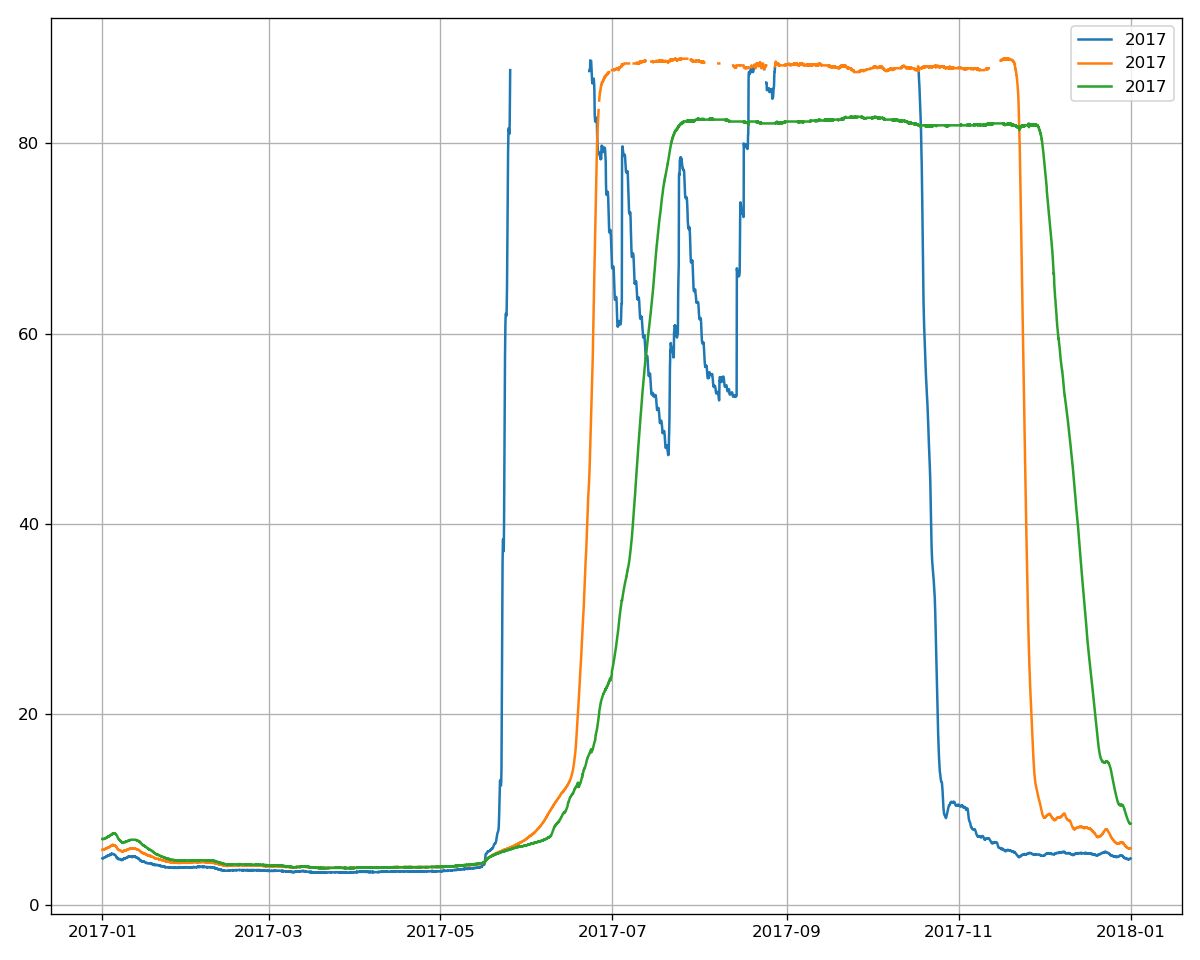

<IPython.core.display.Javascript object>


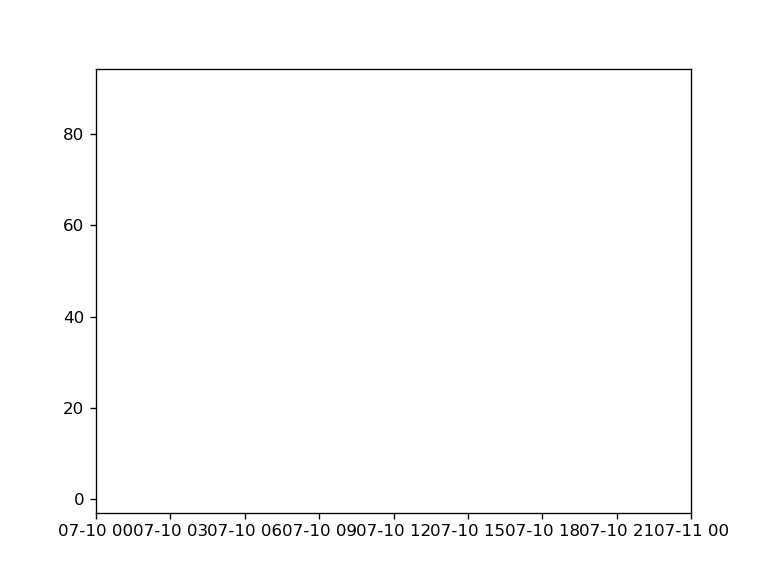

2008-08-27 13:00:00
2019-07-22 18:00:00


In [5]:
# print(Daily.index.year)
plt.figure(figsize=(10,8))
for y in Daily.index.year.unique():
    if y == 2017:
        Y = Hourly.loc[Hourly.index.year==y]
        plt.plot(Y.index,Y['SoilMoist(1)'],label=y)
        plt.plot(Y.index,Y['SoilMoist(2)'],label=y)
        plt.plot(Y.index,Y['SoilMoist(3)'],label=y)
plt.legend()
# plt.xlim(130,220)
plt.grid()
plt.tight_layout()
plt.figure()
plt.plot(Hourly['SoilMoist(1)'])
plt.plot(Hourly['SoilMoist(3)'])
plt.xlim(2017,2018)
# %matplotlib notebook
# fig,ax = plt.subplots(2,2,figsize=(10,10))

# ax1 = ax[0,0]
# ax2 = ax[0,1]
# ax3 = ax[1,0]
# ax4 = ax[1,1]

# ax1.plot(Daily2['AirTemp_Avg'])
# ax1.grid()
# ax1.set_title('Air Temperature')

# ax2.plot(Daily2['Net_Ttl_Rad_Avg'])
# ax2.grid()
# ax2.set_title('Net Radiation')

# ax3.plot(Daily2['Rainfall_Tot'])
# ax3.set_title('Snow Depth')
# # ax3.set_ylim(0,1)
# ax3.grid()

# # ax4.plot(Daily2['SoilMoist(1)'])
# # ax4.plot(Daily2['SoilMoist(2)'])
# ax4.plot(Daily2['SoilMoist(1)'])
# # ax4.plot(Daily2['SoilMoist(2)'])
# # ax4.plot(Daily2['SoilMoist(3)'])
# ax4.plot(Daily2['SoilMoist(4)'])
# # ax4.plot(Daily2['SoilMoist(5)'])
# # ax4.plot(Daily2['SoilMoist(6)'])
# ax4.grid()
# ax4.set_title('Soil Moisture')
# # print(Daily2['SoilMoist(2)'])
# plt.show()
print(Hourly.index.min())
print(Hourly.index.max())

In [10]:
print(Daily.index.month)
Daily['Month'] = Daily.index.month
Daily['DOY'] = Daily.index.dayofyear
MonthlyS = Daily.groupby('DOY').mean()
MonthlyS = MonthlyS.groupby('Month').sum()
Monthly = Daily.groupby('Month').mean()
Monthly['Rainfall_Tot'] = MonthlyS['Rainfall_Tot']
# print(Daily.groupby('Year'))
plt.figure()
plt.plot(Monthly['SoilMoist_Avg(1)'],color='r')
# plt.plot(Monthly['SoilMoist_Avg(2)'],color='g')
# plt.plot(Monthly['SoilMoist_Avg(3)'],color='b')
plt.plot(Monthly['SoilMoist_Avg(4)'],linestyle = ':',color='r')
# plt.plot(Monthly['SoilMoist_Avg(5)'],linestyle = ':',color='g')
# plt.plot(Monthly['SoilMoist_Avg(6)'],linestyle = ':',color='b')
plt.grid()
# plt.xlim(205,235)
print(Monthly['AirTemp_Avg'].min())
print(Monthly['AirTemp_Avg'].mean())
print(Monthly['AirTemp_Avg'].max())
print(Monthly['Rainfall_Tot'].sum())

plt.figure()
plt.bar(Monthly.index,Monthly['AirTemp_Avg'])
plt.grid()


plt.figure()
plt.bar(Monthly.index,Monthly['Rainfall_Tot'])
plt.grid()


plt.figure()
plt.plot(Monthly['Snow_Depth'])
plt.grid()

Int64Index([8, 8, 8, 8, 8, 9, 9, 9, 9, 9,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='TIMESTAMP', length=3982)


<IPython.core.display.Javascript object>

KeyError: 'SoilMoist_Avg(1)'

In [ ]:
import sys
print ('Hourly Varriables:')
for v in Hourly.columns.values:
    print(v, end =', ')
    
    sys.stdout.flush()
print('')
print('')
print ('Daily Varriables:')
i = 0
for v in Daily.columns.values:
    i +=1
    if i == 5:
        i = 0
        print(v)
    else:
        print(v, end = ', ')

In [ ]:
import sys
import time

for f in range(10):
    #delete "\r" to append instead of overwrite
    sys.stdout.write("\r" + str(f))
    sys.stdout.flush()
    time.sleep(1)